In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
df = pd.read_csv('Advertising.csv').drop(columns= ['Unnamed: 0'])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [87]:
df.duplicated().sum()

0

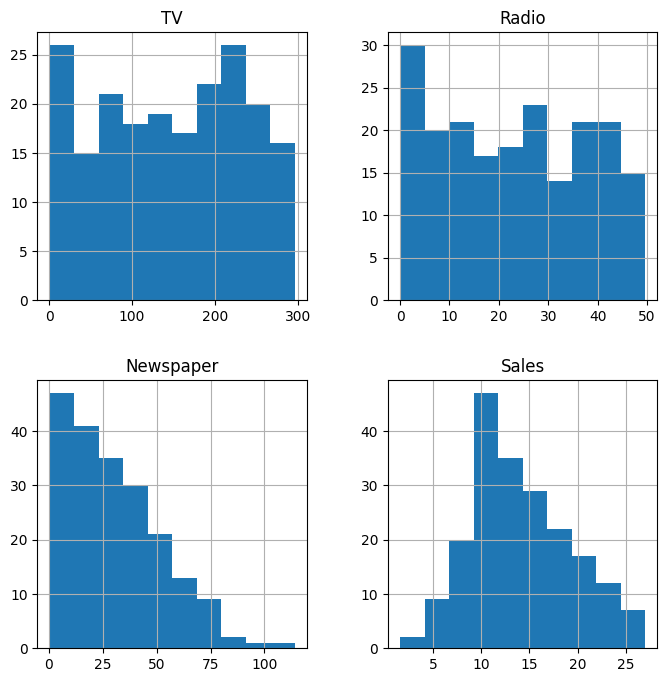

In [88]:
df.hist(figsize=(8, 8));

In [89]:
x_vars

Index(['tv', 'radio', 'newspaper'], dtype='object')

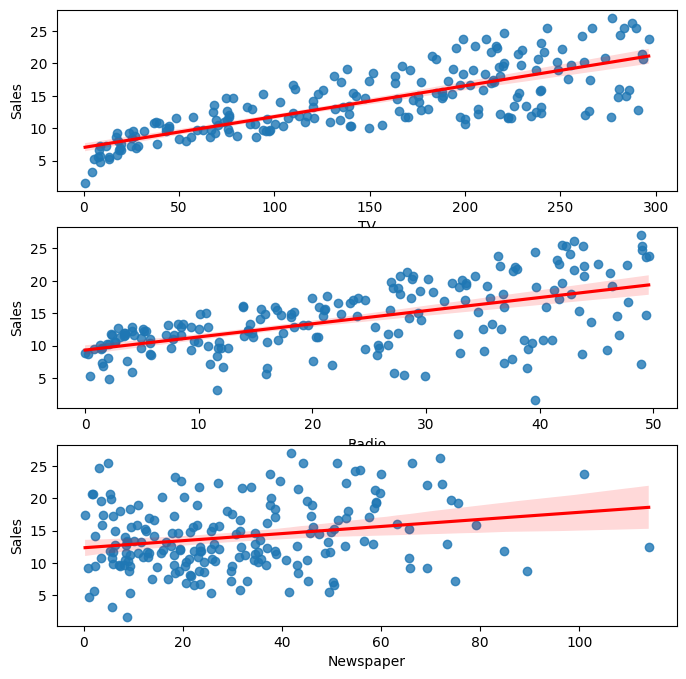

In [90]:
fig, axes =plt.subplots(3,1, figsize=(8,8))
ax = axes.flatten()
x_vars = df.drop(columns=['Sales']).columns

for idx, var in enumerate(x_vars):
    sns.regplot(data=df, x=var, ax=ax[idx], y='Sales', line_kws={'color':'red'})





In [91]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

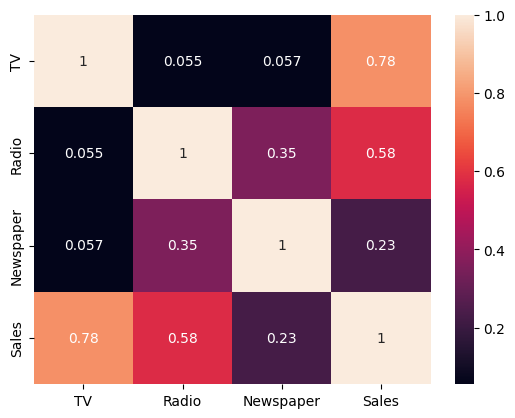

In [92]:
sns.heatmap(df.corr(), annot=True)

In [93]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X = df.drop(columns=['Sales'])
y = df['Sales']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math


In [98]:
def train_and_evaluate(model=LinearRegression()):
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_train_predict = pipeline.predict(X_train)
    y_test_predict =  pipeline.predict(X_test)
    
    
    train_score = np.round(r2_score(y_train, y_train_predict), 2)
    test_score = np.round(r2_score(y_test, y_test_predict), 2)
    
    
    train_mae = np.round(mean_absolute_error(y_train, y_train_predict), 2)
    test_mae = np.round(mean_absolute_error(y_test, y_test_predict), 2)
    
    train_rmse = np.round(math.sqrt(mean_squared_error(y_train, y_train_predict)), 2)
    test_rmse =  np.round(math.sqrt(mean_squared_error(y_test, y_test_predict)), 2)
    
    
    print(f'Train score: {train_score}')
    print(f'Test score: {test_score}\n')
    
    print(f'Train MAE: {train_mae}')
    print(f'Test MAE: {test_mae}\n')
    
    print(f'Train RMSE: {train_rmse}')
    print(f'Test RMSE: {test_rmse}')
    
    return pipeline

In [99]:
train_and_evaluate()

Train score: 0.9
Test score: 0.9

Train MAE: 1.2
Test MAE: 1.46

Train RMSE: 1.64
Test RMSE: 1.78


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

In [101]:
train_and_evaluate(DecisionTreeRegressor())

Train score: 1.0
Test score: 0.95

Train MAE: 0.0
Test MAE: 0.99

Train RMSE: 0.0
Test RMSE: 1.29


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor())])

In [102]:
train_and_evaluate(XGBRegressor())

Train score: 1.0
Test score: 0.97

Train MAE: 0.0
Test MAE: 0.73

Train RMSE: 0.0
Test RMSE: 0.93


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [103]:
train_and_evaluate(RandomForestRegressor())

Train score: 1.0
Test score: 0.98

Train MAE: 0.22
Test MAE: 0.63

Train RMSE: 0.3
Test RMSE: 0.75


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [104]:
pipeline = train_and_evaluate(GradientBoostingRegressor())
pipeline

Train score: 1.0
Test score: 0.98

Train MAE: 0.15
Test MAE: 0.61

Train RMSE: 0.18
Test RMSE: 0.72


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingRegressor())])

In [105]:
import joblib
joblib.dump(pipeline, 'advert_pipeline.joblib')

['advert_pipeline.joblib']

In [106]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [108]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000
